In [34]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [35]:
df = pd.read_csv("data set.csv")

In [36]:
df.head()

,Hour,Hourly Load,Hourly Price
0,1,12468.0,32.18
1,2,12638.7,59.04
2,3,12624.8,18.79
3,4,12597.8,15.78
4,5,12593.6,0.41


In [37]:
df.isna().sum()

Hour            0
Hourly Load     0
Hourly Price    0
dtype: int64

In [38]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [39]:
dataset = np.array(df.loc[:, ["Hourly Load", "Hourly Price"]])

In [40]:
dataset.shape

(1488, 2)

In [41]:
n_steps = 24
X, y = split_sequences(dataset, n_steps)

In [42]:
n_features = X.shape[2]
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=400, verbose=0)

<AxesSubplot:>

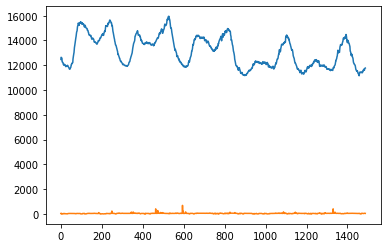

In [48]:
df["Hourly Load"].plot()
df["Hourly Price"].plot()

In [52]:
xt = X[-1].reshape(1, 24, 2)
yt = y[-1]
print(xt, yt)

[[[11438.8      0.  ]
  [11424.8      0.  ]
  [11409.7      0.  ]
  [11396.9     12.74]
  [11451.7     28.92]
  [11434.9     19.72]
  [11434.4     38.99]
  [11441.5     44.75]
  [11422.      51.09]
  [11386.9     47.35]
  [11447.1     48.93]
  [11434.4     45.72]
  [11533.1     44.73]
  [11530.8     39.48]
  [11554.6     33.44]
  [11634.6     32.46]
  [11589.      30.54]
  [11661.4     36.59]
  [11687.5     42.77]
  [11642.5     54.63]
  [11605.7     53.06]
  [11739.9     48.33]
  [11747.5     46.46]
  [11759.5     46.46]]] [11773.4     42.44]


In [49]:
model.predict(xt)

array([[11662.055   ,    36.395065]], dtype=float32)